In [1]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
%matplotlib inline
from collections import Counter
from PIL import Image
import numpy as np
import pandas as pd

c:\Users\wogur\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# 전처리한 csv파일 불러오기
df_금리 = pd.read_csv('금리파일.csv',encoding='utf-8-sig')
df_부동산 = pd.read_csv('부동산파일.csv',encoding='utf-8-sig')
df_주식 = pd.read_csv('주식파일.csv',encoding='utf-8-sig')
df_구글 = pd.read_csv('구글파일.csv',encoding='utf-8-sig')
df_네이버 = pd.read_csv('네이버파일.csv',encoding='utf-8-sig')
df_삼성 = pd.read_csv('삼성파일.csv',encoding='utf-8-sig')
df_애플 = pd.read_csv('애플파일.csv',encoding='utf-8-sig')

In [3]:
# wordcloud에서 한글을 사용할 수 있도록 설정하기
font_path = 'C:\\Users\\user\\anaconda3\\envs\\kiwi\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\malgun.ttf'

In [4]:
# 금리파일
combined_str = ' '.join(df_금리['preprocessed_body'].tolist()) #df 안에 preprocessed_data 들을 하나의 str로 합쳐줌
tokens = word_tokenize(combined_str) #위에서 합쳐준 str을 단어토큰화해줌
word_freq = Counter(tokens) # counter 함수로 각각의 개수확인
top_words = word_freq.most_common(200) #상위 200개
del top_words[0] #첫번째 인덱스는 키워드라 삭제
top_words

[('인하', 5558),
 ('물가', 4336),
 ('상승', 3795),
 ('기준', 3319),
 ('미국', 3193),
 ('있', 3136),
 ('전망', 2981),
 ('률', 2917),
 ('시장', 2775),
 ('은행', 2462),
 ('대출', 2239),
 ('지수', 2130),
 ('치', 2120),
 ('정책', 2116),
 ('예상', 2072),
 ('연준', 1951),
 ('가능', 1932),
 ('올해', 1897),
 ('금융', 1862),
 ('통화', 1781),
 ('경제', 1771),
 ('인플레이션', 1663),
 ('포인트', 1641),
 ('수준', 1536),
 ('성장', 1530),
 ('총재', 1527),
 ('대', 1523),
 ('크', 1510),
 ('대비', 1487),
 ('억', 1482),
 ('연', 1448),
 ('한은', 1426),
 ('하락', 1421),
 ('보이', 1416),
 ('지나', 1404),
 ('오르', 1395),
 ('높', 1392),
 ('분기', 1372),
 ('소비자', 1260),
 ('주택', 1252),
 ('동결', 1249),
 ('둔화', 1203),
 ('달러', 1180),
 ('한국은행', 1172),
 ('투자', 1166),
 ('기자', 1159),
 ('유지', 1147),
 ('전', 1144),
 ('내리', 1126),
 ('상품', 1064),
 ('이후', 1055),
 ('이날', 1054),
 ('서울', 1031),
 ('조', 1023),
 ('주', 1017),
 ('밝히', 1012),
 ('상황', 1008),
 ('발표', 991),
 ('개월', 970),
 ('지표', 951),
 ('변동', 931),
 ('기대', 926),
 ('인상', 895),
 ('만', 893),
 ('영향', 887),
 ('환율', 885),
 ('기록', 884),
 ('최고', 88

In [5]:
# 있,률과 같은 한자리 글자 추가 삭제
top_words=dict(top_words)
words = {}
for k, v in top_words.items():
    if len(k)>1:
        words[k] = v
words

{'인하': 5558,
 '물가': 4336,
 '상승': 3795,
 '기준': 3319,
 '미국': 3193,
 '전망': 2981,
 '시장': 2775,
 '은행': 2462,
 '대출': 2239,
 '지수': 2130,
 '정책': 2116,
 '예상': 2072,
 '연준': 1951,
 '가능': 1932,
 '올해': 1897,
 '금융': 1862,
 '통화': 1781,
 '경제': 1771,
 '인플레이션': 1663,
 '포인트': 1641,
 '수준': 1536,
 '성장': 1530,
 '총재': 1527,
 '대비': 1487,
 '한은': 1426,
 '하락': 1421,
 '보이': 1416,
 '지나': 1404,
 '오르': 1395,
 '분기': 1372,
 '소비자': 1260,
 '주택': 1252,
 '동결': 1249,
 '둔화': 1203,
 '달러': 1180,
 '한국은행': 1172,
 '투자': 1166,
 '기자': 1159,
 '유지': 1147,
 '내리': 1126,
 '상품': 1064,
 '이후': 1055,
 '이날': 1054,
 '서울': 1031,
 '밝히': 1012,
 '상황': 1008,
 '발표': 991,
 '개월': 970,
 '지표': 951,
 '변동': 931,
 '기대': 926,
 '인상': 895,
 '영향': 887,
 '환율': 885,
 '기록': 884,
 '최고': 880,
 '가격': 873,
 '장기': 850,
 '발행': 838,
 '채권': 832,
 '경기': 811,
 '자금': 807,
 '시간': 803,
 '나오': 795,
 '최근': 782,
 '증가': 778,
 '목표': 775,
 '커지': 773,
 '시점': 759,
 '국내': 748,
 '이상': 739,
 '지난해': 734,
 '제공': 734,
 '결정': 718,
 '조정': 716,
 '전월': 714,
 '연방': 713,
 '증시': 704,
 '지속': 703

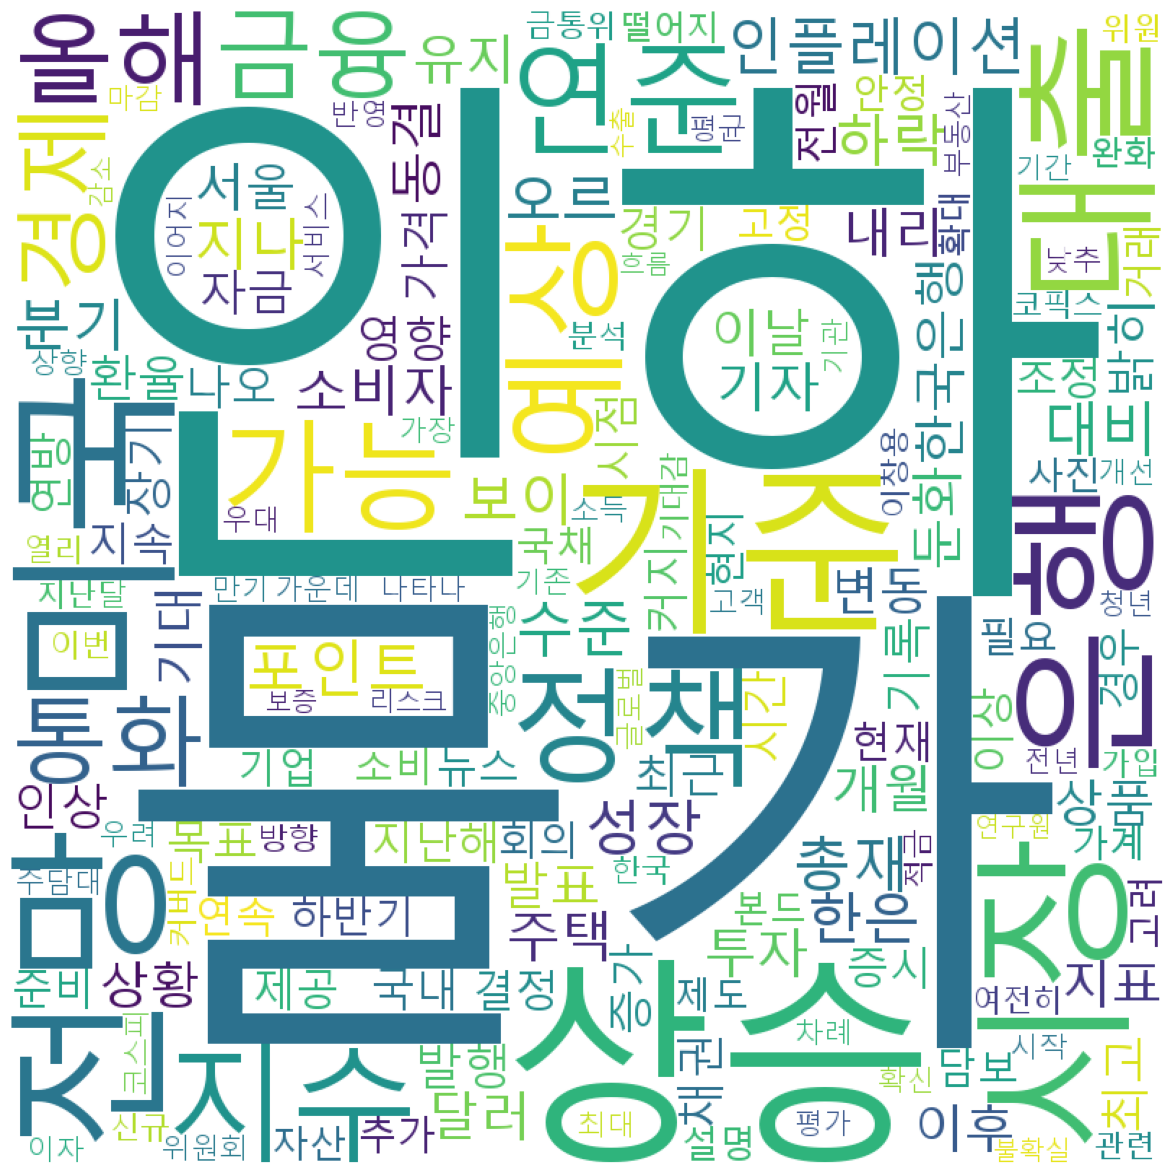

In [6]:
cloud = WordCloud(font_path = font_path, 
                  background_color='white',
                  width=800, height=800)
my_cloud1 = cloud.generate_from_frequencies(dict(words))

arr1 = my_cloud1.to_array()

fig = plt.figure(figsize=(15, 15))
plt.imshow(arr1)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_positive.png') 생성한 그림 저장하기

In [7]:
#부동산파일
combined_str = ' '.join(df_부동산['preprocessed_body'].tolist()) #df 안에 preprocessed_data 들을 하나의 str 로 합쳐줌
tokens = word_tokenize(combined_str) #위에서 합쳐준 str을 단어토큰화해줌
word_freq = Counter(tokens) # counter 함수로 각각의 개수확인
top_words = word_freq.most_common(100) #상위 100개
del top_words[0] #첫번째 인덱스는 키워드라 삭제

In [8]:
# 있,률과 같은 한자리 글자 추가 삭제
top_words=dict(top_words)
words = {}
for k, v in top_words.items():
    if len(k)>1:
        words[k] = v
words

{'금융': 3183,
 '서울': 2579,
 '주택': 2410,
 '시장': 2383,
 '아파트': 2043,
 '사업': 2038,
 '대출': 1948,
 '사업장': 1787,
 '평가': 1713,
 '기준': 1565,
 '가격': 1419,
 '분양': 1335,
 '은행': 1325,
 '상승': 1305,
 '분기': 1301,
 '투자': 1289,
 '지나': 1259,
 '거래': 1239,
 '가구': 1154,
 '규모': 1124,
 '부실': 1122,
 '단지': 1103,
 '공급': 1067,
 '경우': 1027,
 '지난해': 973,
 '전세': 971,
 '관련': 956,
 '기자': 938,
 '기업': 928,
 '자금': 912,
 '정책': 884,
 '이상': 877,
 '증가': 876,
 '올해': 876,
 '가능': 873,
 '대비': 856,
 '정부': 839,
 '구조': 793,
 '최근': 793,
 '금리': 791,
 '보이': 779,
 '매매': 767,
 '수수료': 766,
 '필요': 764,
 '진행': 761,
 '지원': 761,
 '청약': 761,
 '당국': 758,
 '나오': 755,
 '우려': 750,
 '밝히': 735,
 '자산': 733,
 '계획': 729,
 '발표': 728,
 '이후': 723,
 '추진': 711,
 '상황': 694,
 '회사': 693,
 '개선': 684,
 '개발': 682,
 '정리': 674,
 '경기': 669,
 '평균': 659,
 '가장': 658,
 '오르': 658,
 '방안': 658,
 '전국': 650,
 '예정': 645,
 '대책': 637,
 '한국': 637,
 '사진': 622,
 '이번': 622,
 '경제': 622,
 '수준': 613,
 '대상': 611,
 '나타나': 594}

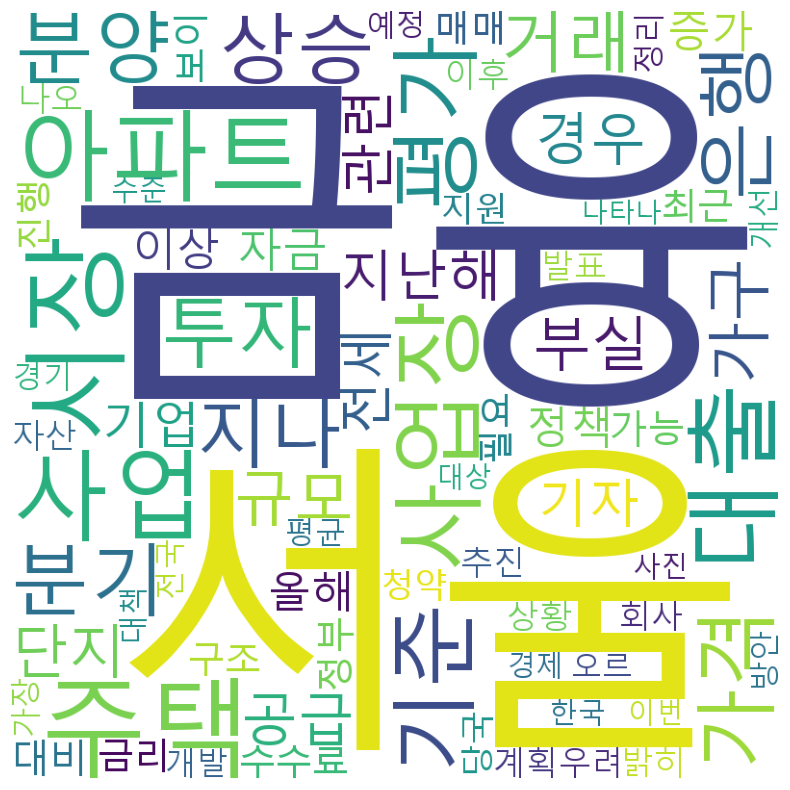

In [9]:
cloud = WordCloud(font_path=font_path,
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_frequencies(dict(words))
arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_positive.png') 생성한 그림 저장하기

In [10]:
# 주식파일
combined_str = ' '.join(df_주식['preprocessed_body'].tolist()) #df 안에 preprocessed_data 들을 하나의 str 로 합쳐줌
tokens = word_tokenize(combined_str) #위에서 합쳐준 str을 단어토큰화해줌
word_freq = Counter(tokens) # counter 함수로 각각의 개수확인
top_words = word_freq.most_common(100) #상위 100개
del top_words[0] #첫번째 인덱스는 키워드라 삭제

In [11]:
# 있,률과 같은 한자리 글자 추가 삭제
top_words=dict(top_words)
words = {}
for k, v in top_words.items():
    if len(k)>1:
        words[k] = v
words

{'투자': 2600,
 '달러': 2366,
 '시장': 1981,
 '미국': 1947,
 '주가': 1775,
 '기업': 1732,
 '투자자': 1665,
 '대표': 1583,
 '거래': 1534,
 '금융': 1190,
 '엔비디아': 1166,
 '지나': 1122,
 '분기': 1109,
 '주주': 1078,
 '기준': 1066,
 '증권': 1046,
 '국내': 1014,
 '자산': 1002,
 '시간': 987,
 '규모': 968,
 '밝히': 927,
 '상장': 921,
 '하이브': 918,
 '보유': 911,
 '종목': 894,
 '매수': 871,
 '올해': 868,
 '카카오': 861,
 '지수': 858,
 '상승': 856,
 '수익': 831,
 '대비': 830,
 '회장': 817,
 '회사': 804,
 '증시': 779,
 '오르': 772,
 '증가': 731,
 '실적': 726,
 '발표': 722,
 '지분': 721,
 '개인': 711,
 '결제': 704,
 '사업': 698,
 '해외': 684,
 '지난해': 675,
 '보이': 659,
 '한국': 657,
 '펀드': 657,
 '기자': 652,
 '이후': 646,
 '그룹': 644,
 '가능': 634,
 '정보': 629,
 '이상': 623,
 '최근': 620,
 '제공': 613,
 '관련': 605,
 '기록': 603,
 '성장': 569,
 '예상': 561,
 '최대': 554,
 '서울': 549,
 '현재': 546,
 '금리': 544,
 '글로벌': 543,
 '사진': 535,
 '가치': 524,
 '매출': 511,
 '최고': 507,
 '매각': 505,
 '운용': 503,
 '경우': 501,
 '매입': 494,
 '공개': 486}

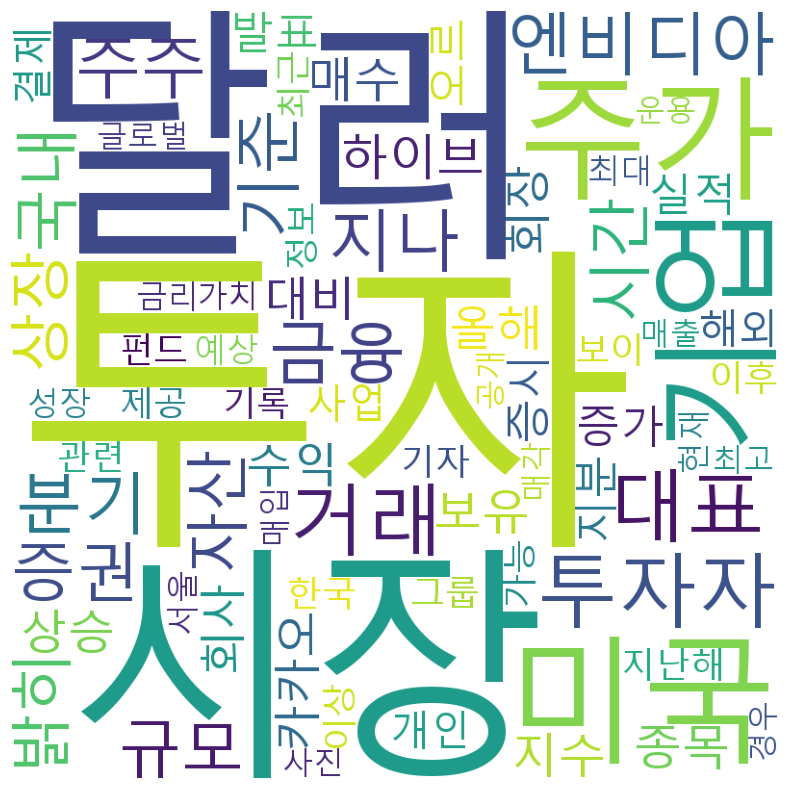

In [12]:
cloud = WordCloud(font_path=font_path,
                  background_color = 'white', 
                  width=800, height=800)
my_cloud3 = cloud.generate_from_frequencies(dict(words))
arr3 = my_cloud3.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr3)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_positive.png') 생성한 그림 저장하기

In [13]:
#구글파일
combined_str = ' '.join(df_구글['preprocessed_body'].tolist()) #df 안에 preprocessed_data 들을 하나의 str 로 합쳐줌
tokens = word_tokenize(combined_str) #위에서 합쳐준 str을 단어토큰화해줌
word_freq = Counter(tokens) # counter 함수로 각각의 개수확인
top_words = word_freq.most_common(100) #상위 100개
del top_words[0] #첫번째 인덱스는 키워드라 삭제

In [14]:
# 있,률과 같은 한자리 글자 추가 삭제
top_words=dict(top_words)
words = {}
for k, v in top_words.items():
    if len(k)>1:
        words[k] = v
words

{'검색': 2095,
 '오픈': 1293,
 '모델': 1114,
 '기업': 1078,
 '미국': 1057,
 '생성': 1031,
 '기능': 1029,
 '공개': 970,
 '기술': 952,
 '개발': 913,
 '시간': 864,
 '서비스': 793,
 '시장': 756,
 '회의': 719,
 '제공': 713,
 '지나': 712,
 '지능': 680,
 '출시': 678,
 '글로벌': 673,
 '인공': 651,
 '애플': 650,
 '재미': 612,
 '현지': 591,
 '밝히': 589,
 '사진': 586,
 '나이': 571,
 '정보': 561,
 '대화': 558,
 '세계': 557,
 '발표': 552,
 '엔진': 548,
 '가능': 527,
 '열리': 524,
 '서울': 515,
 '제미나이': 514,
 '보이': 503,
 '개발자': 495,
 '이번': 493,
 '위원장': 479,
 '콘텐츠': 476,
 '탑재': 471,
 '최고': 468,
 '음성': 468,
 '데이터': 463,
 '유튜브': 454,
 '안전': 444,
 '관련': 440,
 '사용': 433,
 '비서': 432,
 '한국': 429,
 '나오': 425,
 '이용자': 422,
 '방심위': 415,
 '경쟁': 412,
 '달러': 406,
 '새롭': 403,
 '함께': 395,
 '제품': 395,
 '혁신': 393,
 '기반': 392,
 '영상': 384,
 '이날': 384,
 '활용': 380,
 '질문': 373,
 '연례': 368,
 '네이버': 367,
 '다양': 367,
 '답변': 365,
 '투자': 364,
 '행사': 364,
 '광고': 361,
 '지난해': 358,
 '적용': 356,
 '뉴스': 350,
 '최근': 347,
 '프로젝트': 347,
 '선보이': 346,
 '아스트라': 341,
 '결과': 340,
 '기자': 337,
 '이미지': 334,
 '

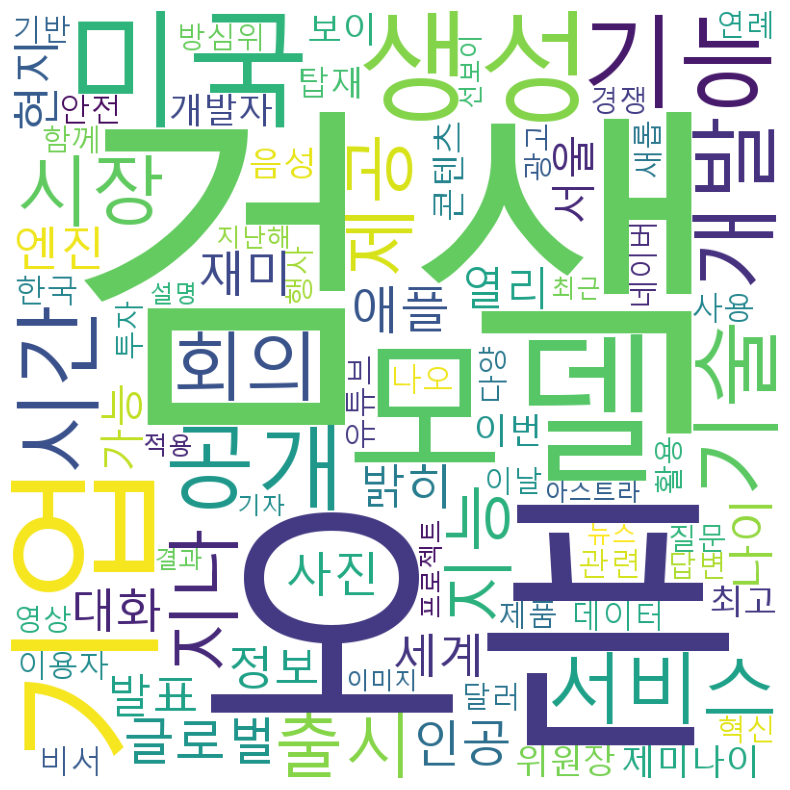

In [15]:
cloud = WordCloud(font_path=font_path,
                  background_color = 'white', 
                  width=800, height=800)
my_cloud4 = cloud.generate_from_frequencies(dict(words))
arr4 = my_cloud4.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr4)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_positive.png') 생성한 그림 저장하기

In [16]:
#네이버파일
combined_str = ' '.join(df_네이버['preprocessed_body'].tolist()) #df 안에 preprocessed_data 들을 하나의 str 로 합쳐줌
tokens = word_tokenize(combined_str) #위에서 합쳐준 str을 단어토큰화해줌
word_freq = Counter(tokens) # counter 함수로 각각의 개수확인
top_words = word_freq.most_common(100) #상위 100개
del top_words[0] #첫번째 인덱스는 키워드라 삭제

In [17]:
# 있,률과 같은 한자리 글자 추가 삭제
top_words=dict(top_words)
words = {}
for k, v in top_words.items():
    if len(k)>1:
        words[k] = v
words

{'라인': 5332,
 '일본': 3551,
 '지분': 2957,
 '정부': 2694,
 '야후': 2504,
 '매각': 1984,
 '기업': 1534,
 '서비스': 1509,
 '소프트뱅크': 1453,
 '정보': 1339,
 '기술': 1270,
 '밝히': 1181,
 '입장': 1171,
 '관련': 1166,
 '사업': 1165,
 '대표': 1128,
 '사태': 1035,
 '가능': 877,
 '글로벌': 863,
 '한국': 845,
 '클라우드': 814,
 '대통령실': 797,
 '관계': 786,
 '지나': 772,
 '기자': 766,
 '제공': 686,
 '서울': 677,
 '행정': 673,
 '다양': 665,
 '요구': 662,
 '조치': 658,
 '경영': 654,
 '필요': 610,
 '개인': 599,
 '관계자': 596,
 '보안': 595,
 '플러스': 589,
 '이번': 571,
 '지도': 563,
 '포함': 543,
 '대응': 537,
 '플랫폼': 533,
 '나오': 533,
 '하이브': 530,
 '라인야후': 520,
 '페이': 516,
 '문제': 508,
 '지원': 499,
 '강화': 498,
 '협상': 495,
 '시장': 494,
 '웹툰': 486,
 '뉴스': 483,
 '사진': 472,
 '상황': 472,
 '홀딩스': 471,
 '자본': 469,
 '내용': 469,
 '진행': 466,
 '보유': 464,
 '협력': 456,
 '운영': 455,
 '해외': 453,
 '유출': 444,
 '제출': 439,
 '강조': 435,
 '지난해': 434,
 '회사': 433,
 '보고서': 431,
 '검토': 428,
 '국내': 425,
 '교육': 423,
 '미래': 421,
 '총무': 419,
 '경우': 417,
 '압박': 414,
 '직원': 414,
 '투자': 409,
 '설명': 406,
 '메신저': 401,
 '노조

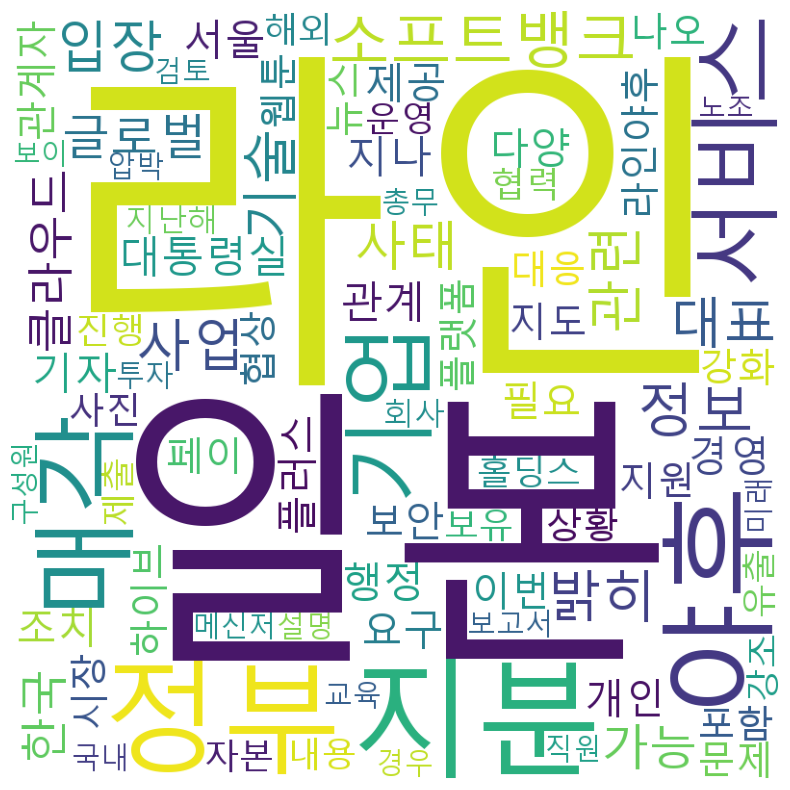

In [18]:
cloud = WordCloud(font_path=font_path,
                  background_color = 'white', 
                  width=800, height=800)
my_cloud5 = cloud.generate_from_frequencies(dict(words))
arr5 = my_cloud5.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr5)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_positive.png') 생성한 그림 저장하기

In [19]:
#삼성파일
combined_str = ' '.join(df_삼성['preprocessed_body'].tolist()) #df 안에 preprocessed_data 들을 하나의 str 로 합쳐줌
tokens = word_tokenize(combined_str) #위에서 합쳐준 str을 단어토큰화해줌
word_freq = Counter(tokens) # counter 함수로 각각의 개수확인
top_words = word_freq.most_common(100) #상위 100개
del top_words[0:2] #첫번째 인덱스는 키워드라 삭제

In [20]:
# 있,률과 같은 한자리 글자 추가 삭제
top_words=dict(top_words)
words = {}
for k, v in top_words.items():
    if len(k)>1:
        words[k] = v
words

{'반도체': 3795,
 '시장': 2910,
 '사업': 2619,
 '제품': 2298,
 '기업': 2244,
 '기술': 2235,
 '밝히': 1834,
 '제공': 1720,
 '노조': 1611,
 '서울': 1545,
 '기자': 1511,
 '미국': 1481,
 '지나': 1438,
 '갤럭시': 1435,
 '메모리': 1430,
 '미래': 1415,
 '올해': 1386,
 '엔비디아': 1378,
 '부회장': 1372,
 '지원': 1366,
 '개발': 1282,
 '사진': 1258,
 '글로벌': 1258,
 '사장': 1243,
 '중국': 1230,
 '분기': 1203,
 '파업': 1136,
 '지난해': 1132,
 '진행': 1076,
 '테스트': 1050,
 '고객': 1048,
 '대표': 1036,
 '투자': 1030,
 '부문': 1029,
 '하이닉스': 1027,
 '회장': 1023,
 '이상': 1011,
 '부문장': 967,
 '서비스': 944,
 '업계': 939,
 '센터': 936,
 '다양': 908,
 '교섭': 905,
 '회사': 892,
 '이번': 890,
 '가능': 880,
 '솔루션': 873,
 '기준': 853,
 '함께': 851,
 '확대': 842,
 '특허': 840,
 '협력': 839,
 '부사장': 828,
 '나오': 826,
 '기능': 826,
 '성장': 814,
 '시간': 808,
 '관련': 806,
 '최근': 796,
 '인사': 795,
 '출시': 792,
 '대비': 781,
 '이후': 778,
 '점유': 767,
 '기록': 759,
 '경쟁력': 757,
 '예정': 753,
 '생산': 752,
 '사용': 752,
 '강화': 751,
 '활용': 746,
 '업체': 745,
 '이날': 740,
 '보이': 731,
 '전자': 723}

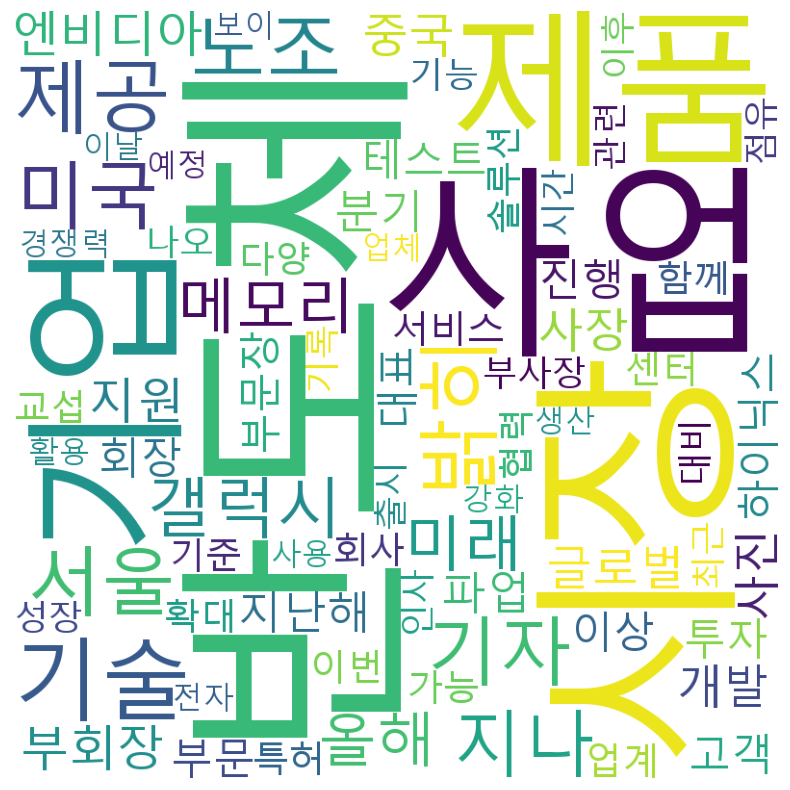

In [21]:
cloud = WordCloud(font_path=font_path,
                  background_color = 'white', 
                  width=800, height=800)
my_cloud6 = cloud.generate_from_frequencies(dict(words))
arr6 = my_cloud6.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr6)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_positive.png') 생성한 그림 저장하기

In [22]:
#애플파일
combined_str = ' '.join(df_애플['preprocessed_body'].tolist()) #df 안에 preprocessed_data 들을 하나의 str 로 합쳐줌
tokens = word_tokenize(combined_str) #위에서 합쳐준 str을 단어토큰화해줌
word_freq = Counter(tokens) # counter 함수로 각각의 개수확인
top_words = word_freq.most_common(100) #상위 100개
del top_words[0] #첫번째 인덱스는 키워드라 삭제

In [23]:
# 있,률과 같은 한자리 글자 추가 삭제
top_words=dict(top_words)
words = {}
for k, v in top_words.items():
    if len(k)>1:
        words[k] = v
words

{'아이폰': 1445,
 '시장': 1131,
 '출시': 1093,
 '프로': 1078,
 '아이패드': 1062,
 '광고': 1046,
 '달러': 895,
 '기능': 861,
 '탑재': 745,
 '미국': 739,
 '중국': 729,
 '공개': 710,
 '제품': 707,
 '삼성전자': 704,
 '지나': 682,
 '모델': 624,
 '스마트폰': 581,
 '개발': 571,
 '현지': 550,
 '시간': 514,
 '엔비디아': 514,
 '올해': 497,
 '기술': 480,
 '사진': 479,
 '판매': 477,
 '기업': 451,
 '세계': 437,
 '밝히': 434,
 '생성': 429,
 '지난해': 427,
 '사용': 421,
 '나오': 413,
 '새롭': 413,
 '전망': 413,
 '갤럭시': 403,
 '보이': 400,
 '소비자': 397,
 '최고': 393,
 '분기': 388,
 '가능': 386,
 '오픈': 385,
 '구글': 382,
 '성능': 378,
 '영상': 372,
 '주가': 371,
 '최근': 370,
 '가장': 357,
 '기기': 357,
 '전하': 353,
 '가격': 347,
 '발표': 339,
 '제공': 337,
 '경쟁': 335,
 '이번': 330,
 '시리즈': 319,
 '지능': 319,
 '인공': 316,
 '업체': 311,
 '비전': 310,
 '음성': 310,
 '기자': 308,
 '이후': 301,
 '대비': 299,
 '오르': 293,
 '삼성': 293,
 '선보이': 292,
 '시리': 292,
 '사용자': 291,
 '기록': 287,
 '예상': 287,
 '예정': 286,
 '설명': 280,
 '개발자': 280,
 '매출': 280,
 '업계': 278,
 '상승': 277,
 '보도': 272}

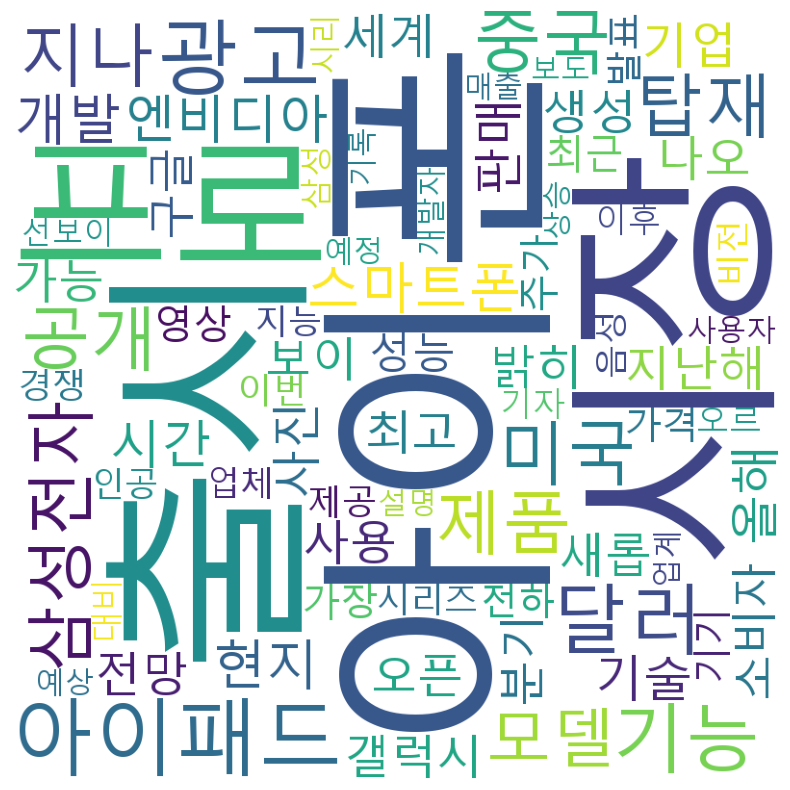

In [24]:
cloud = WordCloud(font_path=font_path,
                  background_color = 'white', 
                  width=800, height=800)
my_cloud7 = cloud.generate_from_frequencies(dict(words))
arr7 = my_cloud7.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr7)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_positive.png') 생성한 그림 저장하기